 ВЫЯВЛЕНИЕ ЗАКОНОМЕРНОСТЕЙ УСПЕШНОСТИ ИГР

 Цель: выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампани на предстоящий год

 -

  Этапы проекта:
  
    1) Просмотр данных
    
    2) Предобработка данных
   
    3) Иследовательский анализ
   
    4) Составление портрета пользователя для каждого региона и проверка гипотез влияниня рейтинга
   
    5) Вывод
   
   -
   
   Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## ДАННЫЕ

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st

In [4]:
try:
    data = pd.read_csv('/content/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')


display(data.head(10))
display(data.info())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

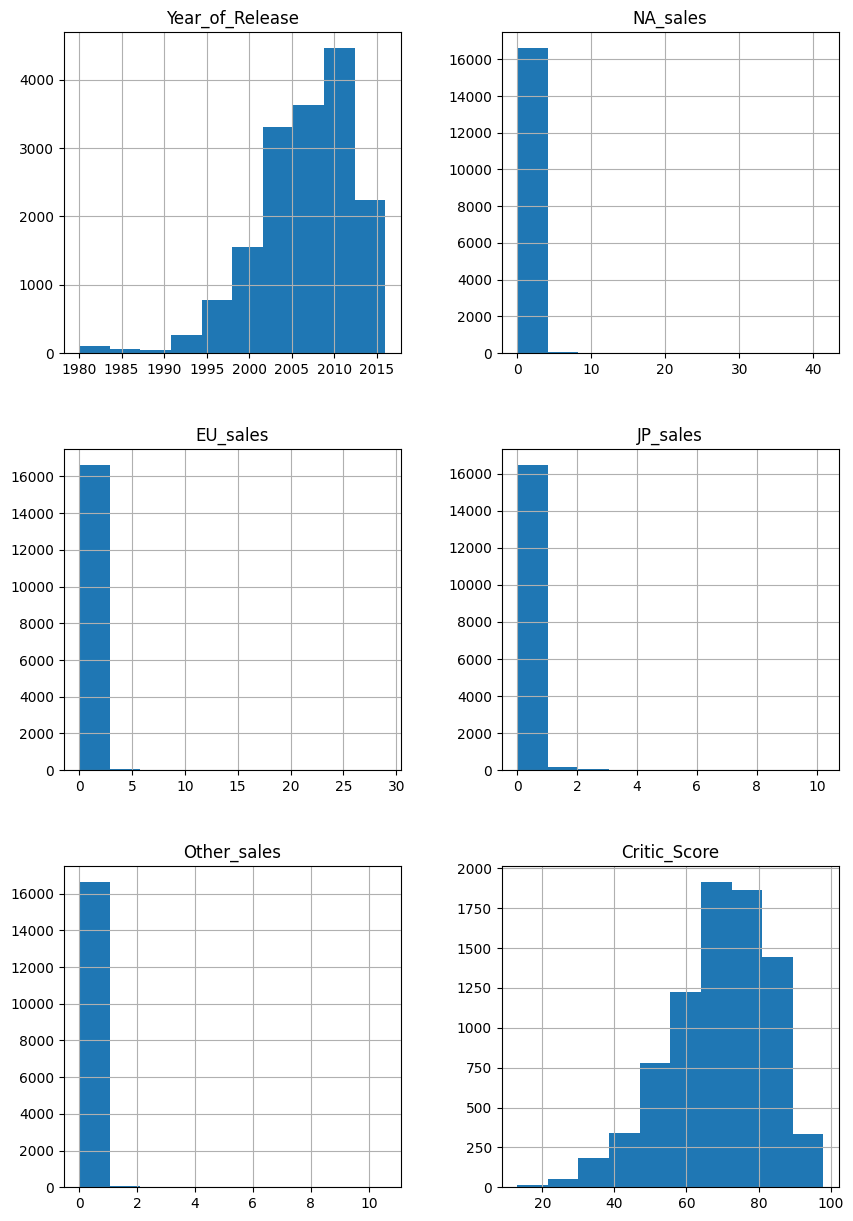

In [5]:
data.hist(figsize=(10, 15));

## ПРЕДОБРАБОТКА ДАННЫХ




In [6]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приводим названия столбцов к нижнему регистру

In [7]:
print('Доля пропусченных значений:',data['year_of_release'].isnull().sum()/len(data)*100)

Доля пропусченных значений: 1.609332934489979


In [8]:
data = data.dropna( subset = ['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')


Меняем тип данных в столбце Year_of_Release и удалим строки с пропущенными значениями, так как их невозмножно заполнить и хи не такое большое колличество



In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data.loc[data['user_score']=='tbd', 'user_score'] = None

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - to be determined - будет определено, данные которые не имеют значения заменим на пустое занечение none


In [11]:
data['user_score'] = data['user_score'].astype('float')

In [12]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
data['critic_score'] = data['critic_score'].replace({np.nan:None})

In [14]:
data['critic_score'].unique()

array([76.0, None, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0,
       77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0,
       73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0,
       66.0, 56.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0, 69.0, 50.0,
       25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0, 20.0,
       53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0, 40.0,
       46.0, 39.0, 34.0, 41.0, 36.0, 31.0, 27.0, 35.0, 26.0, 19.0, 28.0,
       23.0, 24.0, 21.0, 17.0, 13.0], dtype=object)

In [15]:
data['critic_score'] = data['critic_score'].astype(float)

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'] = data['rating'].fillna('unknown')

data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [18]:
data['sum_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  sum_sales        16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Вывод:

      В ходе предобрабоки данных была проделана следующая работа: изменен регист заголовков столбцов, удалены строки без значения года выпуска, пропушенные значения в столбцах user_score и critic_score заменены на None, пропущенные значения столбца rating заменены на unknown

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ

Количество выпускаемой продукции по годам:

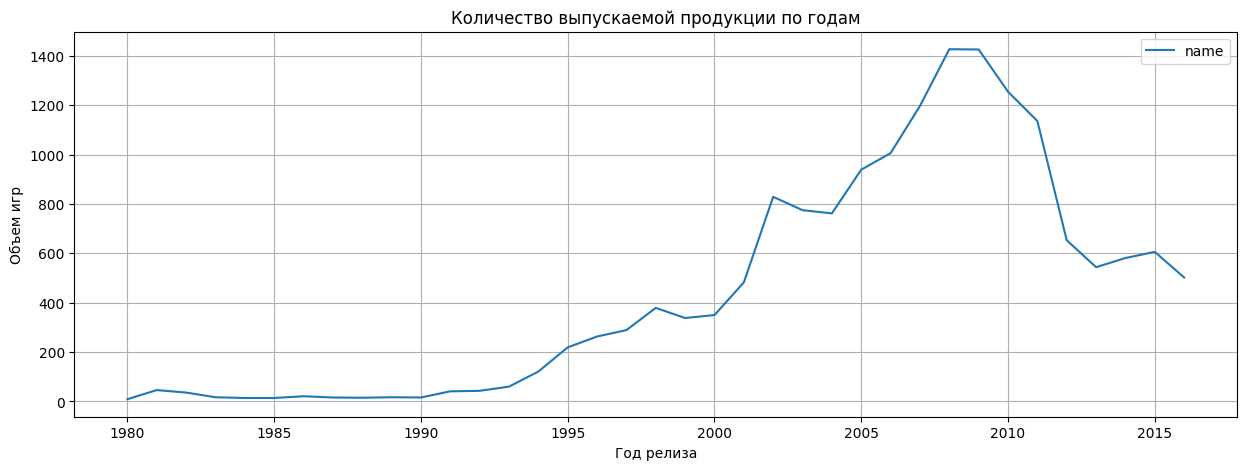

In [19]:
(data
 .pivot_table(index= 'year_of_release', values='name', aggfunc ='count')
 .plot(title = 'Количество выпускаемой продукции по годам', grid=True, xlabel = 'Год релиза', ylabel = 'Объем игр', figsize=(15,5)));

C 90х годов начинается рост выпускаемых игр вплоть до 2007, а затем резкое падение


Популярность платфор:


In [20]:
( data
 .pivot_table(index='platform',values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .head())

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [21]:
platform = (data.loc[(data['platform'] == 'PS2')|(data['platform'] == 'X360')|(data['platform'] == 'PS3')|\
                  (data['platform'] == 'Wii')|(data['platform'] == 'DS')])

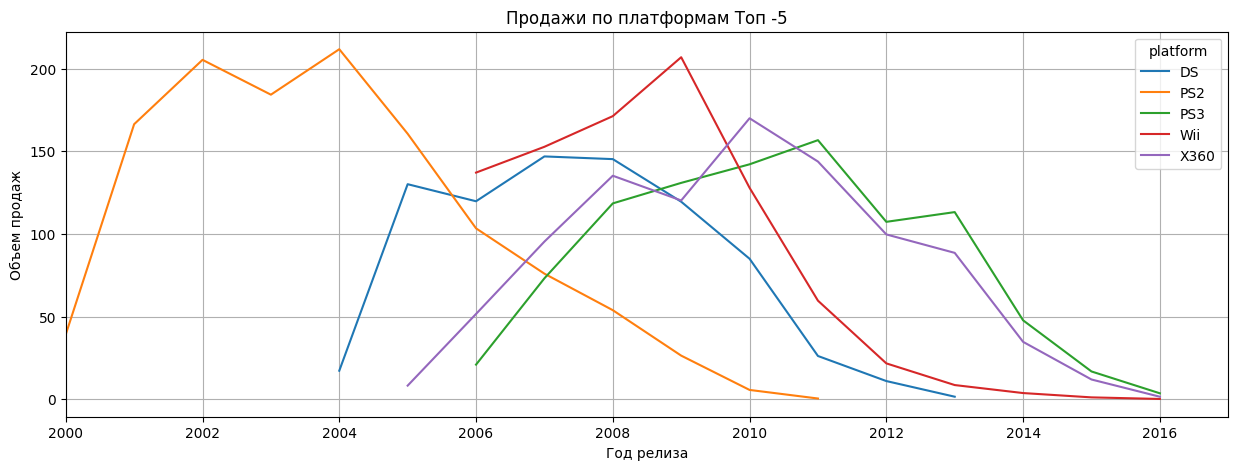

In [22]:
(platform
     .pivot_table(index='year_of_release',values='sum_sales',columns='platform', aggfunc='sum' )
     .plot(title='Продажи по платформам Топ -5', xlabel = 'Год релиза', ylabel = 'Объем продаж', xlim =(2000,2017), grid=True, figsize=(15,5)));

Популярность платформ 8-10лет, дальше они становятся не актуальны

Для работы будем использовать актуальные данные, тоесть данные с 2013 года

In [23]:
data_2013 = data.query('year_of_release>=2013')
( data_2013
 .pivot_table(index='platform',values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .head()
)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


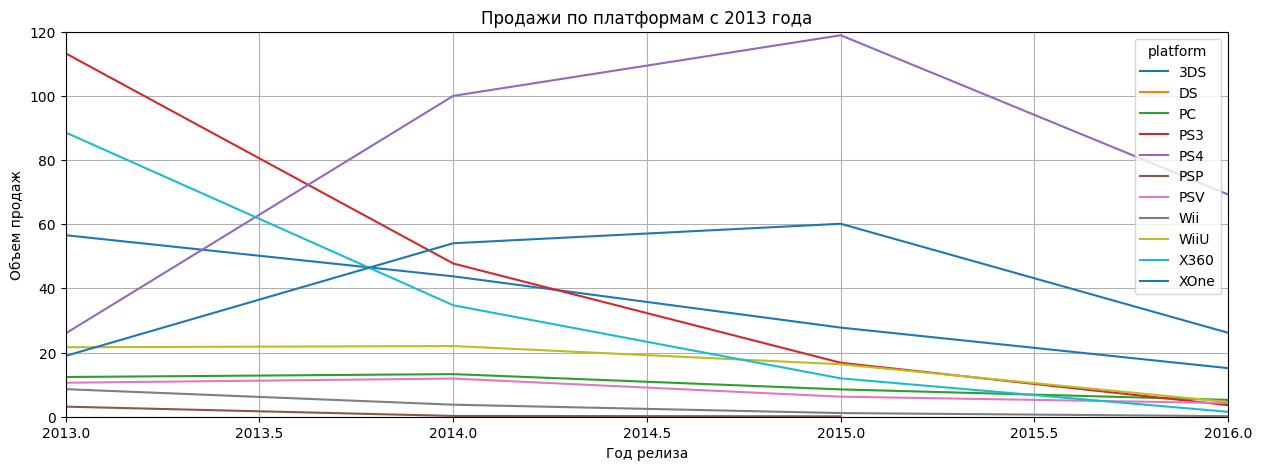

In [24]:
(data_2013
    .pivot_table(index='year_of_release',values='sum_sales',columns='platform', aggfunc='sum')
    .plot(title='Продажи по платформам с 2013 года',  xlabel = 'Год релиза', ylabel = 'Объем продаж', xlim =(2013,2016), ylim =(0,120),grid=True, figsize=(15,5)));

Лучше взять данные с 2014


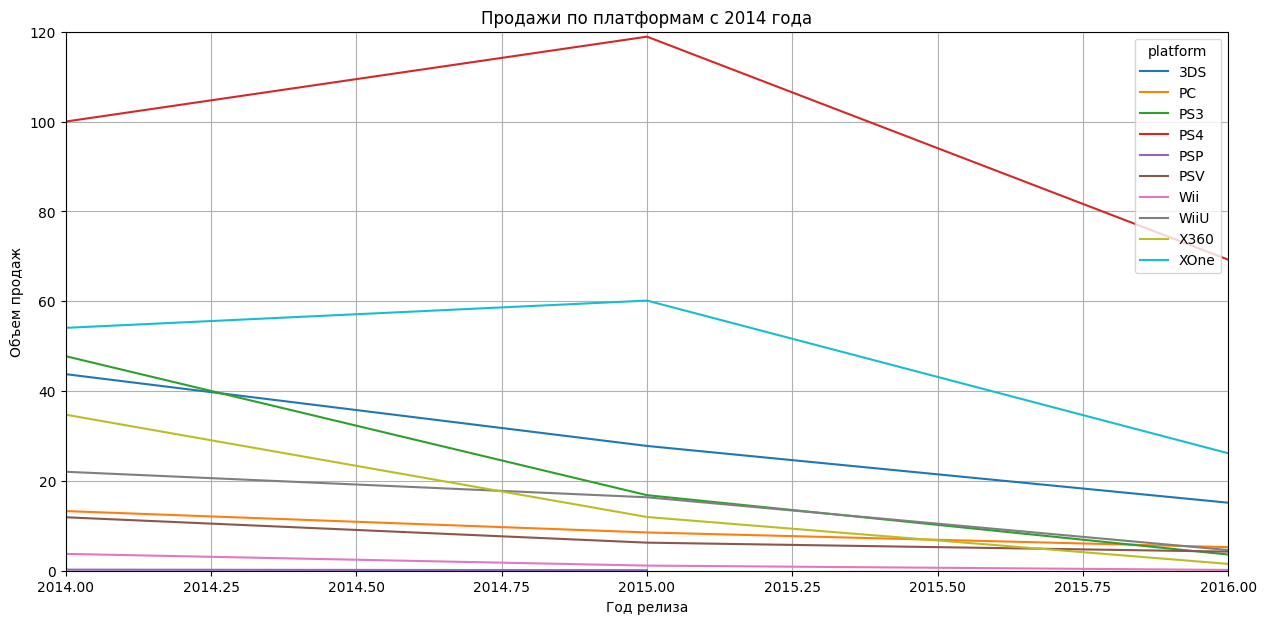

In [25]:
data_2014 = data.query('year_of_release>=2014')
( data_2013
 .pivot_table(index='platform',values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .head())

(data_2014
    .pivot_table(index='year_of_release',values='sum_sales',columns='platform', aggfunc='sum')
    .plot(title='Продажи по платформам с 2014 года',  xlabel = 'Год релиза', ylabel = 'Объем продаж', xlim =(2014,2016), ylim =(0,120),grid=True, figsize=(15,7)));

Самые полпулярные консоли пс3 и пс4  

График по глобальным продажам игр в разбивке по платформам

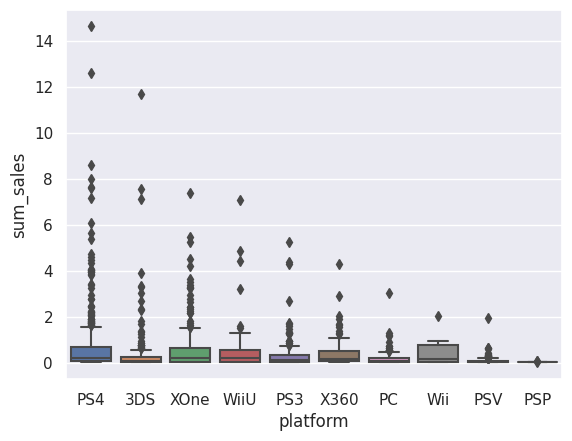

In [26]:
sns.set(style = 'darkgrid')
sns.boxplot(data=data_2014, x='platform', y='sum_sales');


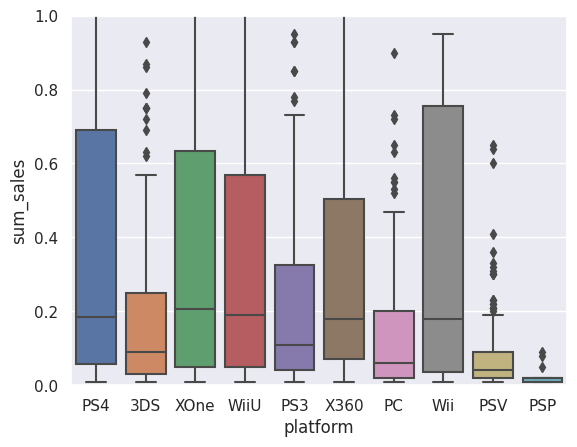

In [27]:
sns.set(style = 'darkgrid') #rc={'figure.figsize':(10,4)}
sns.boxplot(data=data_2014, x='platform', y='sum_sales') #showfliers = False
plt.ylim(0,1);

In [28]:
data_2014 = data.query('year_of_release>=2014')
( data_2014
 .pivot_table(index='name',values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .head()
)

,sum_sales
name,
Call of Duty: Black Ops 3,25.67
Call of Duty: Advanced Warfare,21.97
Grand Theft Auto V,19.26
FIFA 15,17.37
FIFA 16,16.30


медиана у всех находится левее, это означает что большое количество игр имеют не большую сумму продаж, а также на каждой платформе набдюдаются сильные выбросы с очень популярными играми

In [29]:
warnings.filterwarnings("ignore")
data_2014['user_score'] = data_2014['user_score']*10

кореляция покупка-оценка критиков платформы PS4: 0.403
корреляция покупка-оценка пользователей платформы PS4: -0.04
кореляция покупка-оценка критиков платформы XOne: 0.429
корреляция покупка-оценка пользователей платформы XOne: -0.07
кореляция покупка-оценка критиков платформы PS3: 0.447
корреляция покупка-оценка пользователей платформы PS3: -0.167


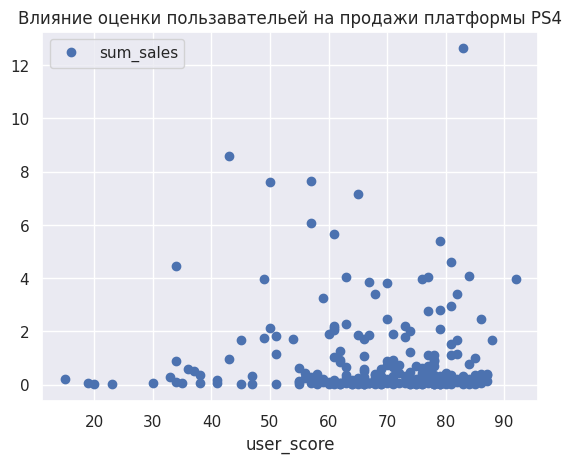

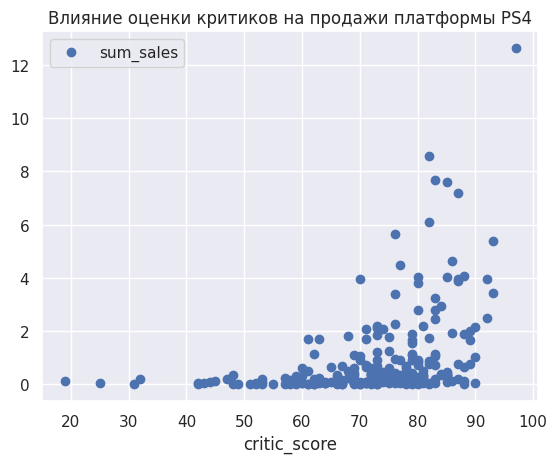

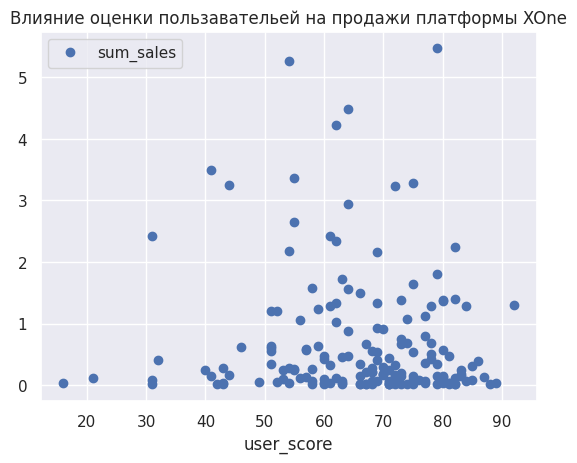

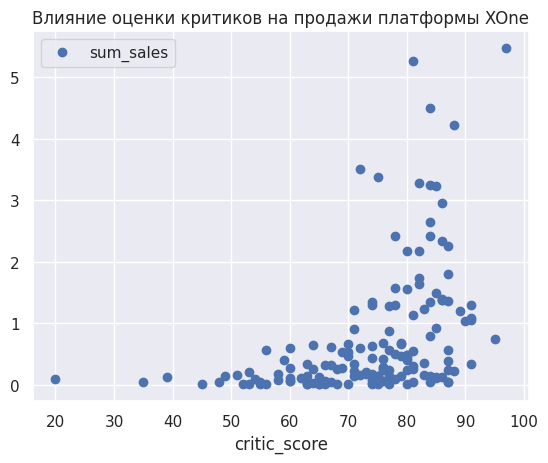

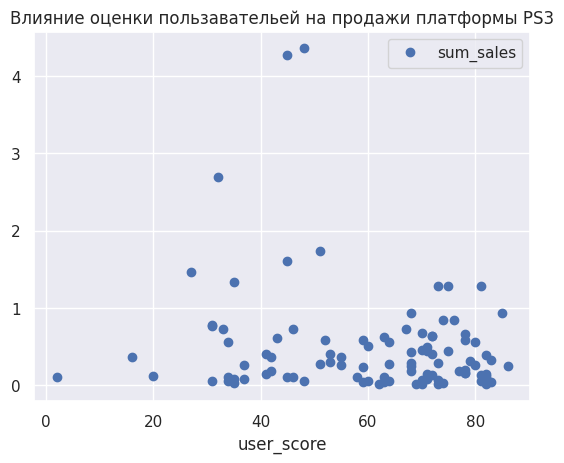

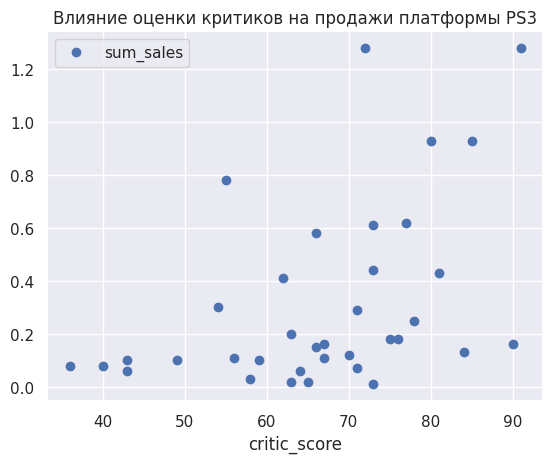

In [30]:
ps4 = data_2014[data_2014['platform']=='PS4']

ps4.plot(style = 'o',x='user_score', y='sum_sales',title='Влияние оценки пользавательей на продажи платформы PS4')
ps4.plot(style = 'o', x='critic_score', y='sum_sales',title='Влияние оценки критиков на продажи платформы PS4')

print('кореляция покупка-оценка критиков платформы PS4:', ps4['critic_score'].corr(ps4['sum_sales']).round(3))
print('корреляция покупка-оценка пользователей платформы PS4:', ps4['user_score'].corr(ps4['sum_sales']).round(3))



xone = data_2014[data_2014['platform']=='XOne']
xone.plot(style = 'o',x='user_score', y='sum_sales',title='Влияние оценки пользавательей на продажи платформы XOne')
xone.plot(style = 'o', x='critic_score', y='sum_sales',title='Влияние оценки критиков на продажи платформы XOne')

print('кореляция покупка-оценка критиков платформы XOne:', xone['critic_score'].corr(xone['sum_sales']).round(3))
print('корреляция покупка-оценка пользователей платформы XOne:', xone['user_score'].corr(xone['sum_sales']).round(3))



ps3 = data_2014[data_2014['platform']=='PS3']

ps3.plot(style = 'o',x='user_score', y='sum_sales',title='Влияние оценки пользавательей на продажи платформы PS3')
ps3.plot(style = 'o', x='critic_score', y='sum_sales',title='Влияние оценки критиков на продажи платформы PS3')

print('кореляция покупка-оценка критиков платформы PS3:', ps3['critic_score'].corr(ps3['sum_sales']).round(3))
print('корреляция покупка-оценка пользователей платформы PS3:', ps3['user_score'].corr(ps3['sum_sales']).round(3))

На платформах PS4 и Xone корреляция оценки пользователей и продажами практически равна 0, что означает что клиенты не выбирают игру по оценке пользователей, на платформе PS3 эта корреляция чуть выще но всерано не значительна. А вот корреляция продажи-оценка критика у всех около 0.425 что говорит о некой связи. Можно сделать вывод что клиенты боьлше ориентируются на оценку критиков чем оценку пользователей


Сравнение жанров:


<Axes: xlabel='genre', ylabel='sum_sales'>

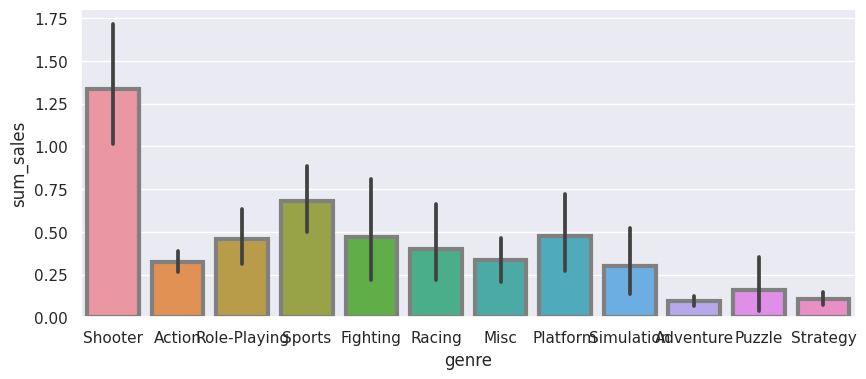

In [33]:
(data
 .pivot_table(index='genre', values='sum_sales',aggfunc='median')
 .sort_values(by='sum_sales'))

sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=data_2014,x='genre', y='sum_sales', edgecolor="0.5", linewidth=3)

Самый популярный жанр - шутер, самые не популярные приключения и стратегии

## портрет пользователя каждого региона

<Axes: title={'center': 'Топ-5 платформ в Японии '}, ylabel='% sales'>

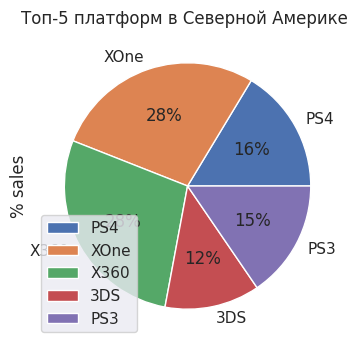

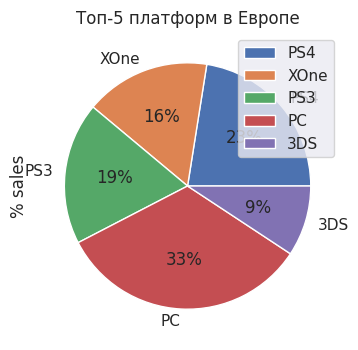

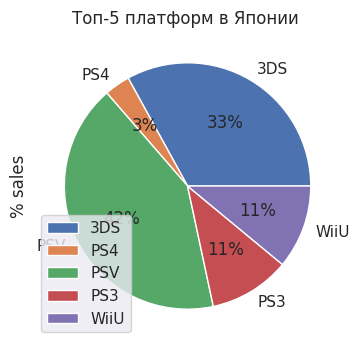

In [34]:
na_top_platform =(data_2014
    .pivot_table(index='platform',values=['na_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='na_sales',ascending=False)
    .head())

eu_top_platform =(data_2014
    .pivot_table(index='platform',values=['eu_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='eu_sales',ascending=False)
    .head())

jp_top_platform =(data_2014
    .pivot_table(index='platform',values=['jp_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='jp_sales',ascending=False)
    .head())

na_top_platform['% sales'] = na_top_platform['na_sales']/na_top_platform['sum_sales']
na_top_platform.plot(kind='pie', y='% sales', title='Топ-5 платформ в Северной Америке ',autopct='%.0f%%')

eu_top_platform['% sales'] = eu_top_platform['eu_sales']/eu_top_platform['sum_sales']
eu_top_platform.plot(kind='pie', y='% sales', title='Топ-5 платформ в Европе',autopct='%.0f%%')

jp_top_platform['% sales'] = jp_top_platform['jp_sales']/jp_top_platform['sum_sales']
jp_top_platform.plot(kind='pie', y='% sales', title='Топ-5 платформ в Японии ',autopct='%.0f%%')

В Северной Америке самая популярная платформа XBox, В Европе предпочитают PC, а в Японии PSV и  3DS

<Axes: title={'center': 'Топ-5 жанров в Японии '}, ylabel='% sales'>

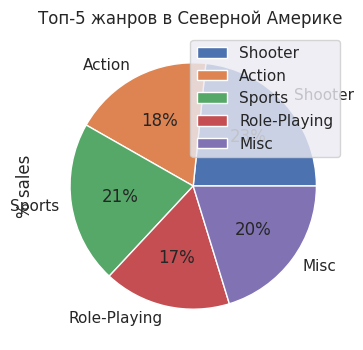

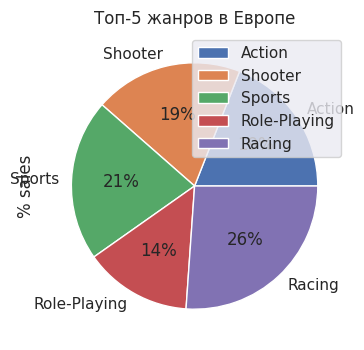

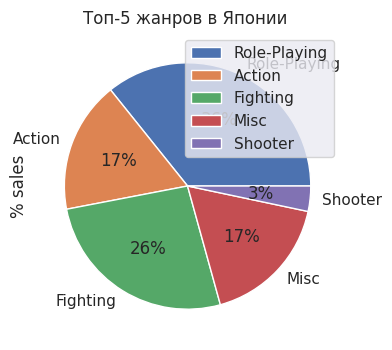

In [35]:
na_top_genre =(data_2014
    .pivot_table(index='genre',values=['na_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='na_sales',ascending=False)
    .head())

eu_top_genre =(data_2014
    .pivot_table(index='genre',values=['eu_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='eu_sales',ascending=False)
    .head())

jp_top_genre =(data_2014
    .pivot_table(index='genre',values=['jp_sales','sum_sales'],aggfunc='sum')
    .sort_values(by='jp_sales',ascending=False)
    .head())

na_top_genre['% sales'] = na_top_genre['na_sales']/na_top_genre['sum_sales']
na_top_genre.plot(kind='pie', y='% sales', title='Топ-5 жанров в Северной Америке ',autopct='%.0f%%')

eu_top_genre['% sales'] = eu_top_genre['eu_sales']/eu_top_genre['sum_sales']
eu_top_genre.plot(kind='pie', y='% sales', title='Топ-5 жанров в Европе',autopct='%.0f%%')

jp_top_genre['% sales'] = jp_top_genre['jp_sales']/jp_top_genre['sum_sales']
jp_top_genre.plot(kind='pie', y='% sales', title='Топ-5 жанров в Японии ', autopct='%.0f%%', normalize=True)

Самый популярный жанр в Северной Америке Шутер, в Европе гонки, в Японии ролевые игры

<Axes: title={'center': 'Рейтинг ESRB в Японии'}, ylabel='jp_sales'>

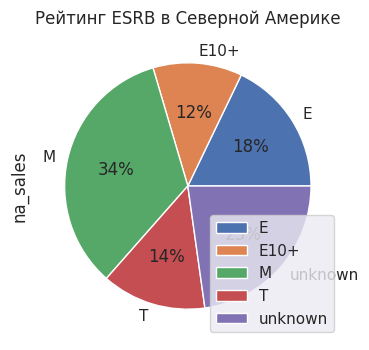

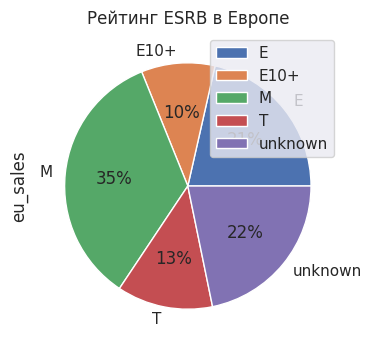

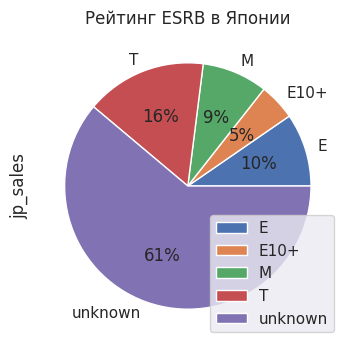

In [36]:
(data_2014
 .pivot_table(index='rating', values=['na_sales'], aggfunc='sum')
 .plot(kind='pie', y='na_sales', title='Рейтинг ESRB в Северной Америке',autopct='%.0f%%'))

(data_2014
 .pivot_table(index='rating', values=['eu_sales'], aggfunc='sum')
 .plot(kind='pie', y='eu_sales', title='Рейтинг ESRB в Европе',autopct='%.0f%%'))

(data_2014
 .pivot_table(index='rating', values=['jp_sales'], aggfunc='sum')
 .plot(kind='pie', y='jp_sales', title='Рейтинг ESRB в Японии',autopct='%.0f%%'))


Самая популярная возрастная категория в Европе и Северной Америке - 'M' - Подходит для лиц старше 17 лет. В Японии популярна категория 'T' от 13 лет но очень большое количество игр без рейтинга. Регионы Северной Америки и Европы очень схожы по распределению категорий, в Японии распределение похоже(если не учитывать неизвестные значения)за исключением того что категория 'T' меняется местами с категорией 'M'.



# Гипотезы влияния рейтинга




Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [37]:
platform_xone = data_2014[data_2014['platform']== "XOne"]['user_score'].dropna()
platform_pc = data_2014[data_2014['platform']== "PC"]['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости

result = st.ttest_ind(platform_xone, platform_pc, equal_var = False)

print('Значение p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается ')

Значение p-value: 0.11601398086668918
Нулевая гипотеза не отвергается 


Нулевя гепотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Нулевя гепотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [38]:
genre_action = data_2014[data_2014['genre']=='Action']['user_score'].dropna()
genre_sports = data_2014[data_2014['genre']=='Sports']['user_score'].dropna()

alpha = 0.05

result = st.ttest_ind(genre_action, genre_sports, equal_var = False)
print(result.pvalue)

if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

1.182555038264477e-14
Нулевая гипотеза отвергается


# ВЫВОД

 - PS4, XOne - самые популярные платформы за актуальный периуд с 2014 года
 - Покупатели больше доверяют отзывам критиков.
 - Лидеры продаж по жанрам за актуальный период - Шутер, спорт и платформер
 - Попуоярность палтформ и жанров олилается по регионам
 - В Северной Америке и Европе преобладает возрастное ограничение: от 17 лет.
 - В Японии больше всех игр для всех возрстов и от 13 лет.
 - Также можно предположить что рейтинг не влияет на выбор платформы, но влияет на выбор жанра




